<a href="https://colab.research.google.com/github/Joefamouze/Machine_learning/blob/master/movie_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** An IMDB movie review classification**

There are two different movie reviews, positive or negative. We will build a model that predicts if a review is either of them using a binary classification model. The data will be fetched from tensorflow dataset.

In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
''' num_words is set to 10000 words this allows for quick filtering operations such as:
"only consider the top 10,000 most
common words, but eliminate the top 20 most common words" '''

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
train_labels[11]

0

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])


1641221/1641221 [==============================] - 0s 0us/step


In [5]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

** Preparing the Data **

This is an important step because you cannot directly feed lists of integers into a neural network. They have different lenghts but a neural ntwrk expects to process contiguous batches of data. We have to turn our list into tensors.
We can do this by **padding** our list so they have the uniform lenght.
Or **Multi-hot encode** the list to turn them into vectors of 0s and 1s. this would mean for instance, turning the sequence [8, 5] into a 10,000-dimensional vector taht would be all 0s exvept the indices 8 and 5 which would be 1s

In [6]:
# vectorizing the data

import numpy as np

def vectorize_sequences(sequences, dim=10000):
  results = np.zeros((len(sequences), dim))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train[1]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [9]:
y_train[1]

0.0

**Building the model**


In [10]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid"),
])


In [11]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [12]:
x_val = x_train[:10000]
partail_x_train = x_train[10000:]
y_val = y_train[:10000]
partail_y_train = y_train[10000:]


In [13]:
history = model.fit(partail_x_train,
                    partail_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 8s 88ms/step - loss: 0.5331 - accuracy: 0.7687 - val_loss: 0.4210 - val_accuracy: 0.8392
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3328 - accuracy: 0.8947 - val_loss: 0.3168 - val_accuracy: 0.8822
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2473 - accuracy: 0.9192 - val_loss: 0.2862 - val_accuracy: 0.8876
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1975 - accuracy: 0.9358 - val_loss: 0.2836 - val_accuracy: 0.8862
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1652 - accuracy: 0.9476 - val_loss: 0.2778 - val_accuracy: 0.8875
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1415 - accuracy: 0.9537 - val_loss: 0.2850 - val_accuracy: 0.8855
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1164 - accuracy: 0.9649 - val_loss: 0.3031 - val_accuracy: 0.8826
Epoch 8/20
30

In [14]:
history_dict = history.history
history_dict.keys()
[u"accuracy", u"loss", u"val_accuracy", u"val_loss"]

['accuracy', 'loss', 'val_accuracy', 'val_loss']

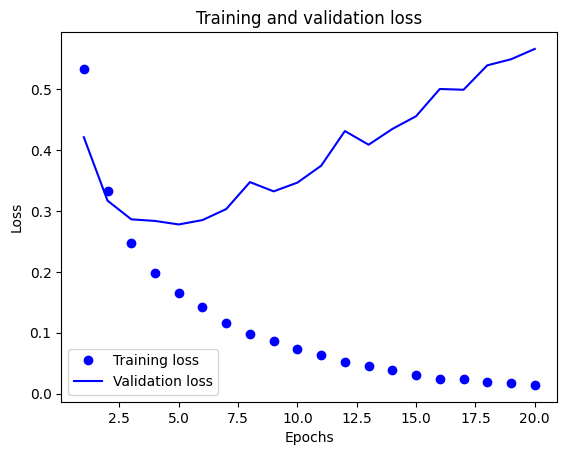

In [15]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

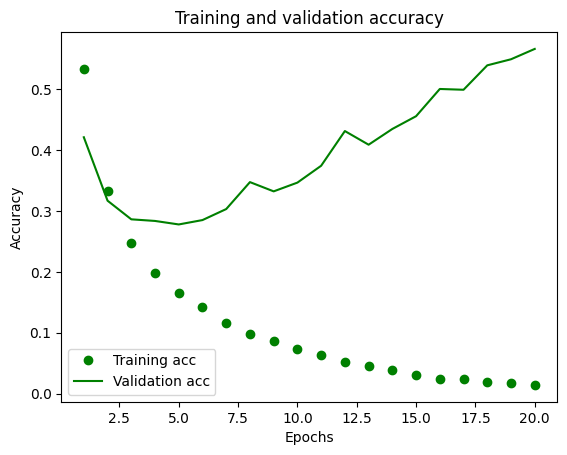

In [16]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "go", label="Training acc")
plt.plot(epochs, val_loss_values, "g", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

** Training graph **

The training loss decreases with every epoch and the training accuracy increases with every epoch. This is what happnes when running gradient descent optimization--the quantity I am trying to minimize should be less with every iteration. But this isn't the case for validation loss and accuracy: they are plateaued at the fourth epoch. This is an indication that model will not generalize well on new dataset. There is an overfitting. To prevent this, its okay to stop training after the fourth epoch.


In [17]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [18]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 14ms/step - loss: 0.4658 - accuracy: 0.8117
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2725 - accuracy: 0.9052
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2112 - accuracy: 0.9240
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.2917 - accuracy: 0.8840


In [19]:
results

[0.29168301820755005, 0.8840000033378601]

In [ ]:
model.predict(x_test, batch_size=512)

**Classifying newswires: A multiclass classification example**

we’ll build a model to classify Reuters newswires into 46 mutually
exclusive topics. Because we have many classes, this problem is an instance of multiclass
classification, and because each data point should be classified into only one category,
the problem is more specifically an instance of single-label multiclass classification.
If each data point could belong to multiple categories (in this case, topics), we’d be
facing a multilabel multiclass classification problem.

In [22]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [24]:
print(len(train_data))
print(len(test_data))
print(train_data[10])

8982
2246
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [25]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [26]:
from tensorflow.keras.utils import to_categorical


y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [27]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"])

In [28]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [29]:
history = model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 43ms/step - loss: 2.6146 - accuracy: 0.5118 - val_loss: 1.7401 - val_accuracy: 0.6430
Epoch 2/20
16/16 [==============================] - 0s 23ms/step - loss: 1.4763 - accuracy: 0.6923 - val_loss: 1.3783 - val_accuracy: 0.6970
Epoch 3/20
16/16 [==============================] - 0s 21ms/step - loss: 1.1496 - accuracy: 0.7498 - val_loss: 1.1820 - val_accuracy: 0.7340
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.9379 - accuracy: 0.7915 - val_loss: 1.0842 - val_accuracy: 0.7600
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.7728 - accuracy: 0.8301 - val_loss: 1.0082 - val_accuracy: 0.7920
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.6445 - accuracy: 0.8589 - val_loss: 0.9521 - val_accuracy: 0.7980
Epoch 7/20
16/16 [==============================] - 0s 20ms/step - loss: 0.5369 - accuracy: 0.8860 - val_loss: 0.9204 - val_accuracy: 0.8060
Epoch 8/20
16

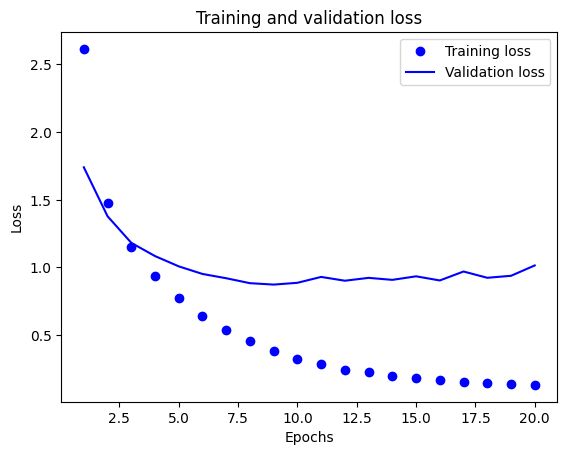

In [30]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

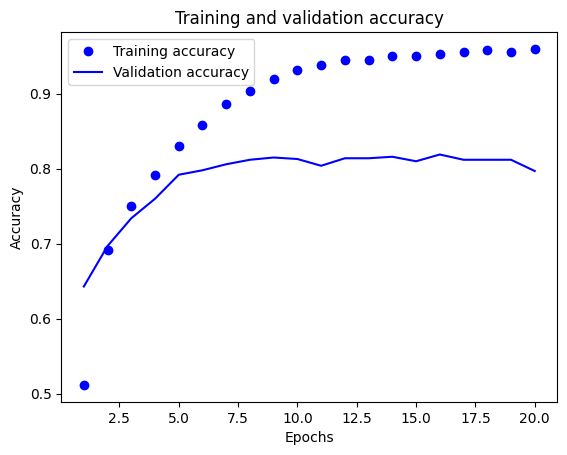

In [31]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [32]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"])

model.fit(x_train,
    y_train,
    epochs=9,
    batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 14ms/step - loss: 2.7460 - accuracy: 0.4987
Epoch 2/9
18/18 [==============================] - 0s 14ms/step - loss: 1.5355 - accuracy: 0.6830
Epoch 3/9
18/18 [==============================] - 0s 14ms/step - loss: 1.1656 - accuracy: 0.7468
Epoch 4/9
18/18 [==============================] - 0s 14ms/step - loss: 0.9509 - accuracy: 0.7939
Epoch 5/9
18/18 [==============================] - 0s 15ms/step - loss: 0.7925 - accuracy: 0.8278
Epoch 6/9
18/18 [==============================] - 0s 15ms/step - loss: 0.6596 - accuracy: 0.8543
Epoch 7/9
18/18 [==============================] - 0s 14ms/step - loss: 0.5498 - accuracy: 0.8788
Epoch 8/9
18/18 [==============================] - 0s 14ms/step - loss: 0.4618 - accuracy: 0.9015
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.8970 - accuracy: 0.7930


In [33]:
results

[0.8969866633415222, 0.792965292930603]

In [34]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [35]:
predictions[0].shape

(46,)

In [38]:
predictions[0]

array([2.4217564e-04, 1.1791369e-04, 8.6919725e-05, 7.0016968e-01,
       2.8313488e-01, 7.4467367e-05, 6.1249843e-06, 1.8110480e-04,
       5.2818116e-03, 1.7810294e-04, 1.5294210e-05, 2.7252673e-04,
       1.3301920e-04, 1.4097772e-04, 1.3225456e-04, 1.8036674e-04,
       1.2423077e-03, 6.1783713e-04, 7.5326985e-05, 4.1107769e-04,
       1.3780296e-03, 3.6969234e-04, 1.8004313e-04, 3.2520786e-04,
       4.9095834e-05, 4.6406680e-04, 1.8424918e-05, 9.8098435e-06,
       8.5649066e-05, 6.3949457e-04, 1.8282773e-05, 3.3991251e-04,
       5.1693380e-05, 2.8637809e-05, 1.3235740e-04, 4.6498449e-06,
       1.2521633e-04, 2.2217489e-05, 1.2575096e-05, 2.8490114e-03,
       1.6818260e-05, 3.1418334e-05, 3.1225725e-05, 1.6266325e-05,
       3.2293654e-05, 7.3732015e-05], dtype=float32)

In [41]:
np.argmax(predictions[0])

3